### House Prices Dataset Cleaning Exercise

### Import libraries

In [816]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer  # Required to enable IterativeImputer
from sklearn.impute import IterativeImputer

from scipy import stats

### Load the dataset


In [817]:
df = pd.read_csv('datasets/house_prices.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [818]:
df_index = pd.read_csv('datasets/house_prices.csv', index_col=0)
df_index

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Copy the dataframe

In [819]:
df_0 = df.copy()

### Observing the data frame

In [820]:
# Use df.shape to observe number of rows and columns
df.shape

(1460, 81)

In [821]:
# Use df.head() to view the first 5 rows of the dataset.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [822]:
# Use df.info() to get the concise summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [823]:
# Use df.describe() to get basic statistics for numeric columns.
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [824]:
# Use df.dtypes to see the data types of each column.
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [825]:
# Use df.memory_usage(deep=True) to understand memory usage by each column.
df.memory_usage(deep=True).sort_values(ascending=False)

RoofMatl         81755
Exterior1st      81730
Exterior2nd      81721
Neighborhood     81022
SaleCondition    80530
                 ...  
EnclosedPorch    11680
YrSold           11680
MiscVal          11680
SalePrice        11680
Index              132
Length: 82, dtype: int64

### Slicing the data frame

In [826]:
# Select rows 10 to 20 using df.iloc[].
df.iloc[10:21]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000


In [827]:
# Select columns 'LotFrontage' to 'LotShape' by label using df.loc[].
df.loc[:, 'LotFrontage':'LotShape']

,LotFrontage,LotArea,Street,Alley,LotShape
0,65.0,8450,Pave,NaN,Reg
1,80.0,9600,Pave,NaN,Reg
2,68.0,11250,Pave,NaN,IR1
3,60.0,9550,Pave,NaN,IR1
4,84.0,14260,Pave,NaN,IR1
...,...,...,...,...,...
1455,62.0,7917,Pave,NaN,Reg
1456,85.0,13175,Pave,NaN,Reg
1457,66.0,9042,Pave,NaN,Reg
1458,68.0,9717,Pave,NaN,Reg


In [828]:
# Select rows where 'OverallQual' > 7 
df.loc[df['OverallQual'] > 7].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000


In [829]:
# Select rows where 'OverallQual' > 7 and columns 'OverallQual' and 'SalePrice' using df.loc[] and give back only those two columns
df.loc[df['OverallQual'] > 7, ['OverallQual', 'SalePrice']]

,OverallQual,SalePrice
4,8,250000
6,8,307000
11,9,345000
20,8,325300
22,8,230000
...,...,...
1417,8,340000
1437,8,394617
1442,10,310000
1447,8,240000


In [830]:
# Access the value at position [4, 80] using df.iat[].
val_4_80 = df.iat[4, 80]
int(val_4_80)

250000

In [831]:
# Access the value at row 4, column 'SalePrice' using df.at[].
int(df.at[4, 'SalePrice'])

250000

In [832]:
# Extract rows with 'SalePrice' greater than 500000.
price_over_50 = df[df['SalePrice'] > 500000]
price_over_50

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [833]:
price_over_50.sort_values(by=["LotArea"], ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


In [834]:
# Extract rows with 'SalePrice' greater than 500000.
price_over_50 = df.loc[df['SalePrice'] > 500000, ['SalePrice','LotFrontage']]
price_over_50.sort_values(ascending=False, by='SalePrice')

,SalePrice,LotFrontage
691,755000,104.0
1182,745000,160.0
1169,625000,118.0
898,611657,100.0
803,582933,107.0
1046,556581,85.0
440,555000,105.0
769,538000,47.0
178,501837,63.0


In [835]:
# Select a random sample of 10 rows.
df.sample(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
69,70,50,RL,81.0,15593,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,225000
820,821,60,RL,72.0,7226,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,183000
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
169,170,20,RL,NaN,16669,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,228000
833,834,20,RL,100.0,10004,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,167000
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
1024,1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml,287000
503,504,20,RL,100.0,15602,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,3,2010,WD,Normal,289000
922,923,20,RL,65.0,10237,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,169990
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950


In [836]:
# Select top 5 houses by 'GrLivArea' (above ground living area).
df.nlargest(5, 'GrLivArea')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [837]:
# Select bottom 5 houses by 'LotArea'.
df.nsmallest(5, 'LotArea')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000
1039,1040,180,RM,21.0,1477,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,80000
614,615,180,RM,21.0,1491,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,75500
489,490,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,86000
1038,1039,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,97000


### Data Visualization

In [838]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Numeric data

In [839]:
# Obtain the numeric columns
df_numeric = df.select_dtypes(include=['int','float'])
df_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [840]:
df_numeric.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
LotArea            0
MSSubClass         0
Id                 0
OverallCond        0
OverallQual        0
YearRemodAdd       0
YearBuilt          0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
BsmtFinSF1         0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
1stFlrSF           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [841]:
df_numeric = df_numeric[['MSSubClass', 'LotFrontage', 'LotArea','MasVnrArea','PoolArea','SalePrice']]
df_numeric

,MSSubClass,LotFrontage,LotArea,MasVnrArea,PoolArea,SalePrice
0,60,65.0,8450,196.0,0,208500
1,20,80.0,9600,0.0,0,181500
2,60,68.0,11250,162.0,0,223500
3,70,60.0,9550,0.0,0,140000
4,60,84.0,14260,350.0,0,250000
...,...,...,...,...,...,...
1455,60,62.0,7917,0.0,0,175000
1456,20,85.0,13175,119.0,0,210000
1457,70,66.0,9042,0.0,0,266500
1458,20,68.0,9717,0.0,0,142125


In [842]:
numeric_cols = df_numeric.columns
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'PoolArea',
       'SalePrice'],
      dtype='object')

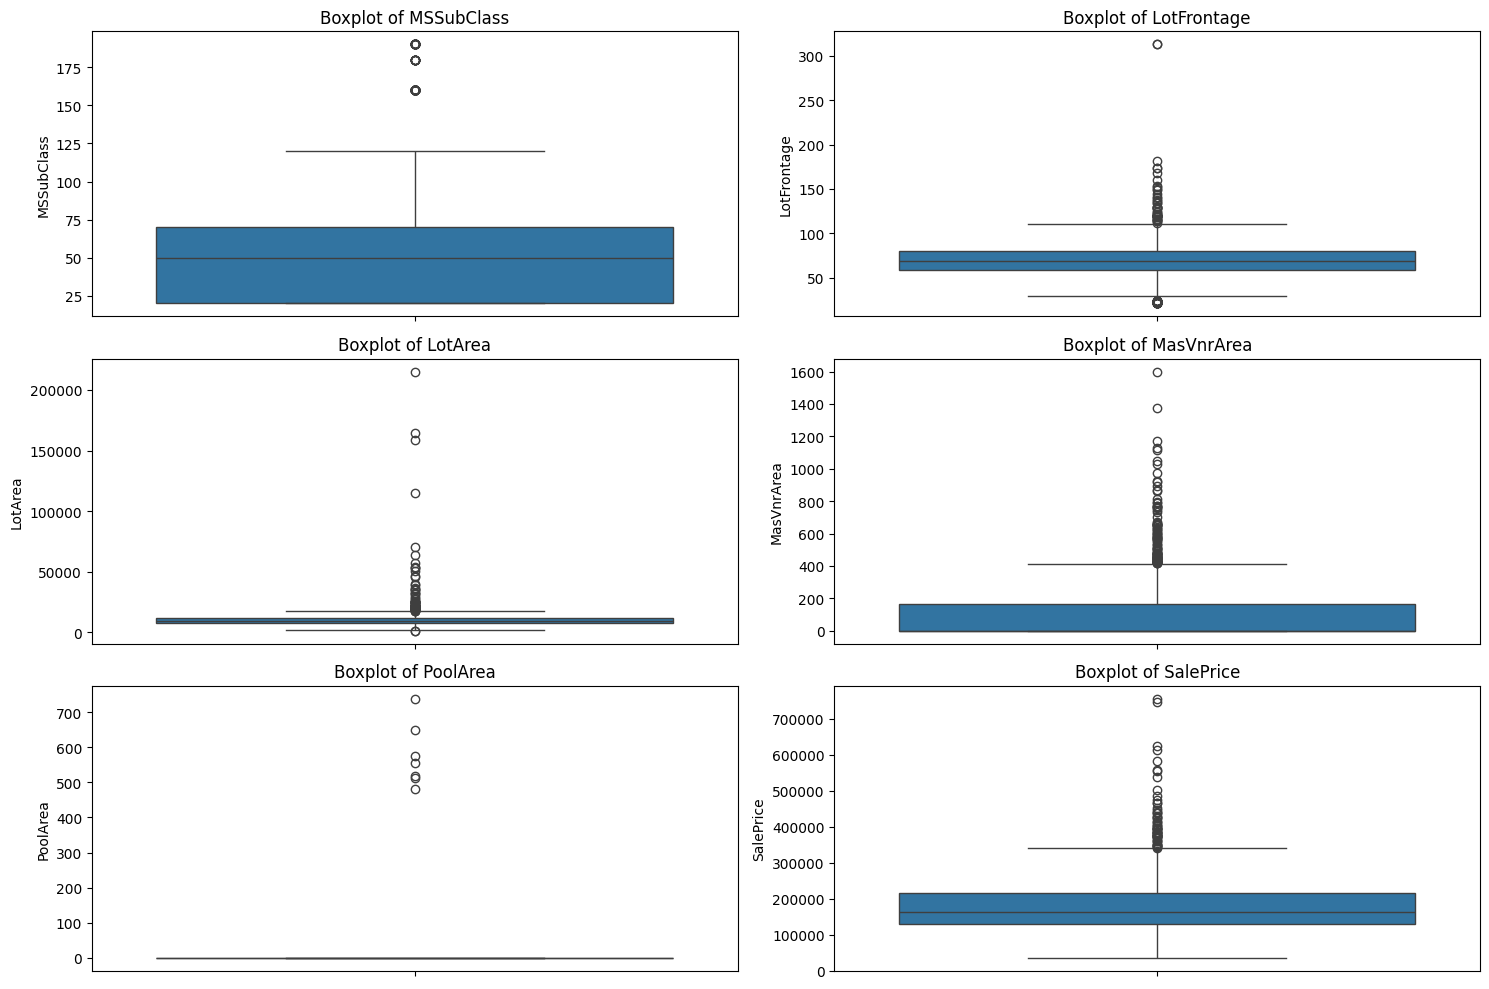

In [843]:
# PLotting boxplots to examine numeric columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

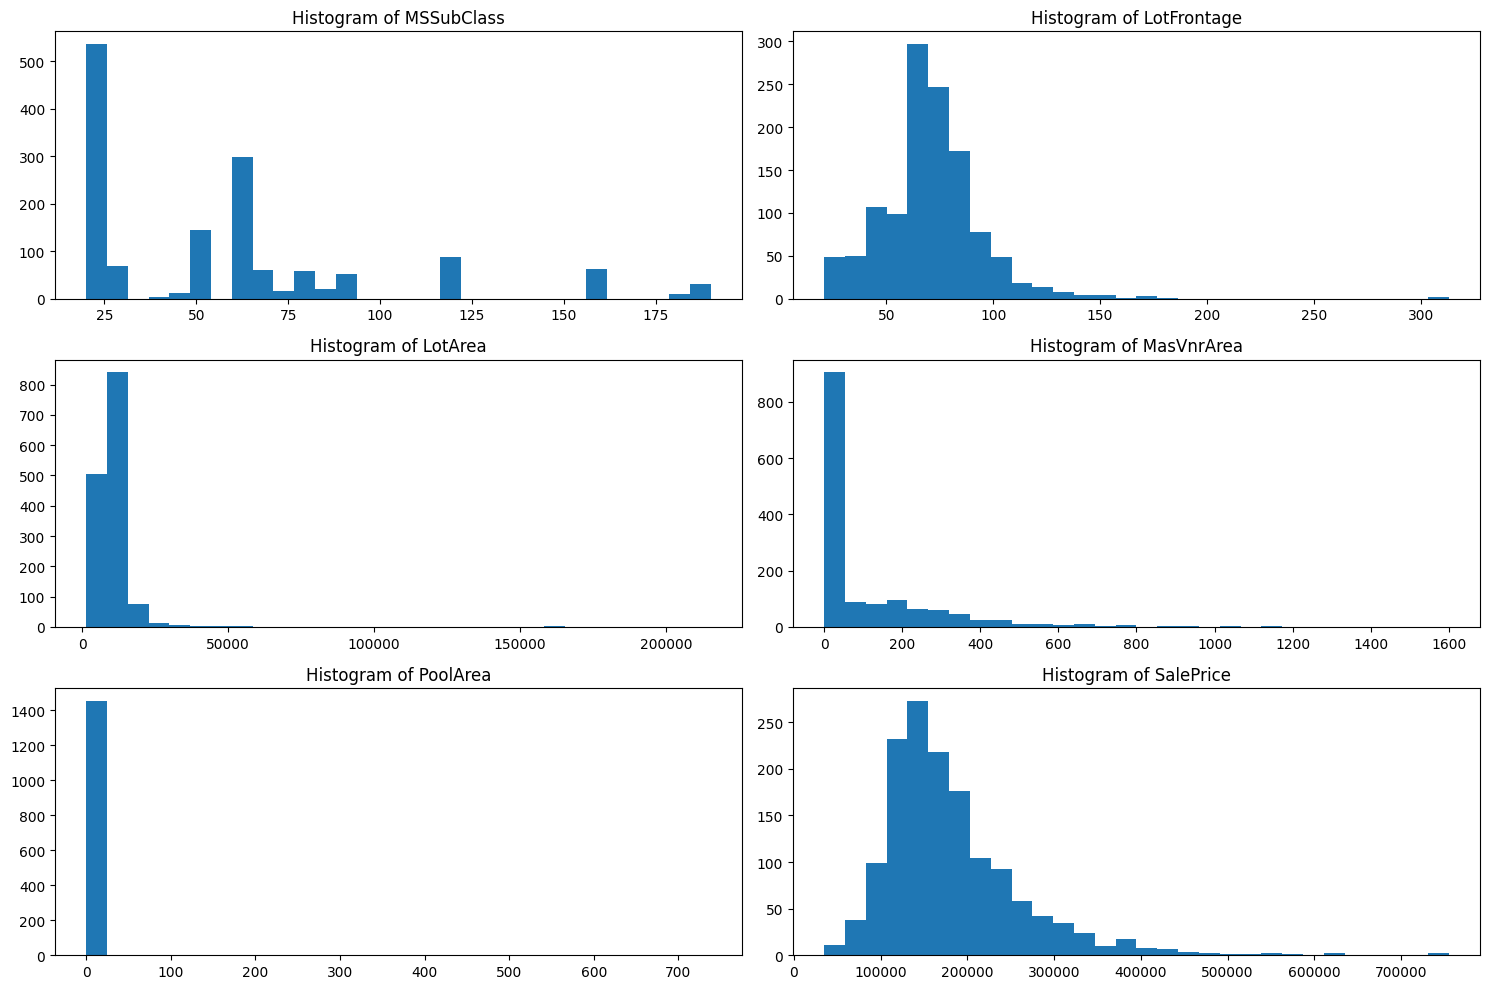

In [844]:
# Visualize using histograms
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    plt.hist(df[col], bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

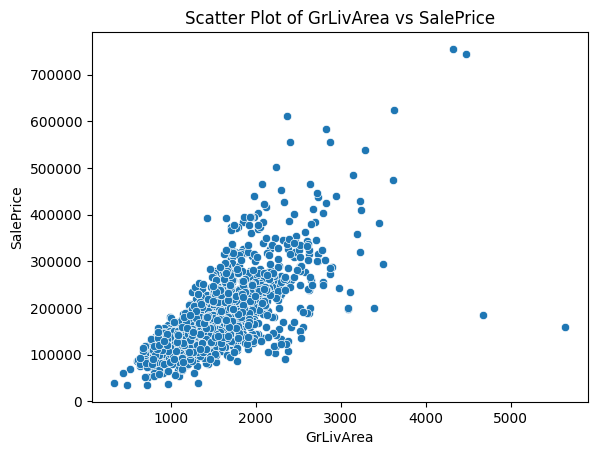

In [845]:
# Scatter plot for 'GrLivArea' vs 'SalePrice' to detect outliers (Seaborn)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Scatter Plot of GrLivArea vs SalePrice')
plt.show()

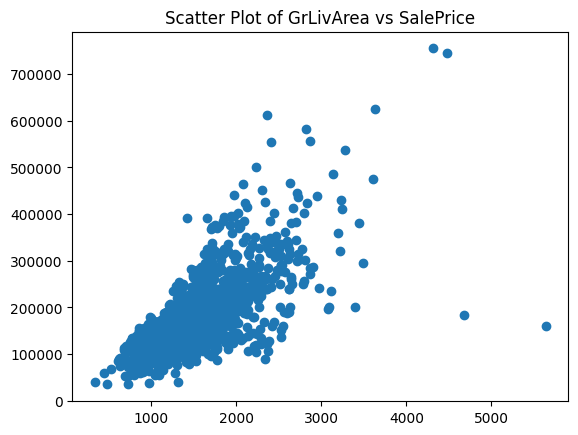

In [846]:
# Scatter plot for 'GrLivArea' vs 'SalePrice' to detect outliers (Matplotlib)
plt.scatter(x='GrLivArea', y='SalePrice', data=df)
plt.title('Scatter Plot of GrLivArea vs SalePrice')
plt.show()

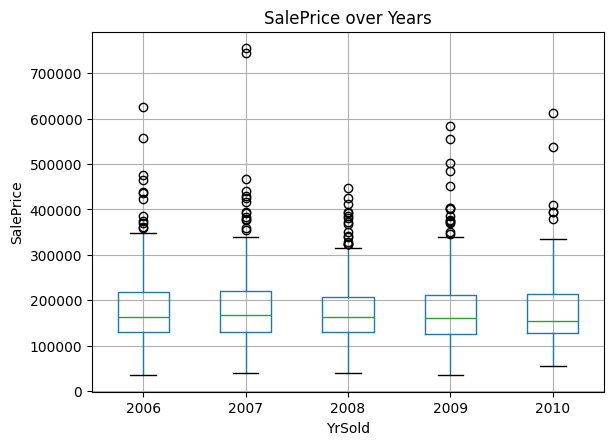

In [847]:
# Box plot for 'SalePrice' over 'YrSold'.
df.boxplot(column='SalePrice', by='YrSold')
plt.suptitle('')
plt.title('SalePrice over Years')
plt.ylabel('SalePrice')
plt.show()

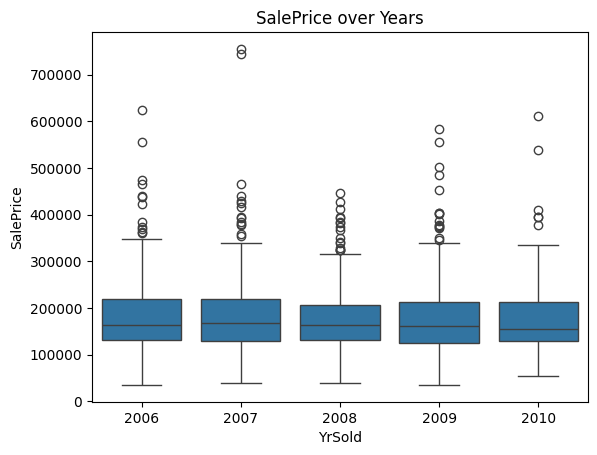

In [848]:
# Box plot for 'SalePrice' over 'YrSold'.
sns.boxplot(y='SalePrice', x='YrSold', data = df)
plt.suptitle('')
plt.title('SalePrice over Years')
plt.ylabel('SalePrice')
plt.show()

#### Categorical data

In [849]:
# Obtain the numeric columns
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [850]:
df_cat.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageFinish       81
GarageQual         81
GarageType         81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
Condition1          0
Condition2          0
LotShape            0
Street              0
MSZoning            0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
RoofStyle           0
Heating             0
ExterCond           0
Foundation          0
HouseStyle          0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
BldgType            0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
SaleType            0
SaleCondition       0
dtype: int64

In [851]:
df_cat = df_cat[['Alley', 'FireplaceQu', 'PoolQC']]
df_cat

,Alley,FireplaceQu,PoolQC
0,NaN,NaN,NaN
1,NaN,TA,NaN
2,NaN,TA,NaN
3,NaN,Gd,NaN
4,NaN,TA,NaN
...,...,...,...
1455,NaN,TA,NaN
1456,NaN,TA,NaN
1457,NaN,Gd,NaN
1458,NaN,NaN,NaN


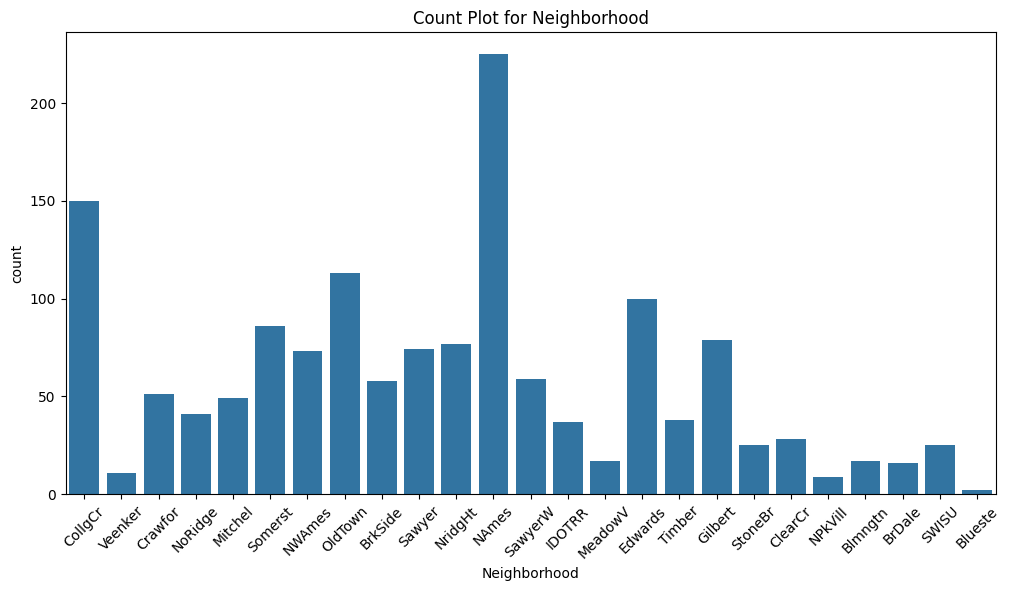

In [852]:
# Visualize counts for 'Neighborhood' including any potential outliers.
plt.figure(figsize=(12,6))
sns.countplot(x='Neighborhood', data=df)
plt.xticks(rotation=45)
plt.title('Count Plot for Neighborhood')
plt.show()

### Creating subset of data

In [853]:
continuous_cols = ['MSSubClass', 'LotFrontage', 'LotArea','MasVnrArea','PoolArea','SalePrice']
categorical_cols = ['Alley', 'FireplaceQu', 'PoolQC']

In [854]:
df_selected = df[continuous_cols + categorical_cols]
df_selected

,MSSubClass,LotFrontage,LotArea,MasVnrArea,PoolArea,SalePrice,Alley,FireplaceQu,PoolQC
0,60,65.0,8450,196.0,0,208500,NaN,NaN,NaN
1,20,80.0,9600,0.0,0,181500,NaN,TA,NaN
2,60,68.0,11250,162.0,0,223500,NaN,TA,NaN
3,70,60.0,9550,0.0,0,140000,NaN,Gd,NaN
4,60,84.0,14260,350.0,0,250000,NaN,TA,NaN
...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,0.0,0,175000,NaN,TA,NaN
1456,20,85.0,13175,119.0,0,210000,NaN,TA,NaN
1457,70,66.0,9042,0.0,0,266500,NaN,Gd,NaN
1458,20,68.0,9717,0.0,0,142125,NaN,NaN,NaN


### Handling Missing Values

Continuous data

In [855]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Mean imputation

In [856]:
df_numeric.isna().sum().sort_values(ascending=False)

LotFrontage    259
MasVnrArea       8
MSSubClass       0
LotArea          0
PoolArea         0
SalePrice        0
dtype: int64

In [857]:
# Replace missing values in continuous columns with the mean.
df_mean_imputed = df.copy()

for col in continuous_cols:
    df_mean_imputed[col+ "_mean"] = df_mean_imputed[col].fillna(df_mean_imputed[col].mean())

# Imputed columns
selected_cols = [col+"_mean" for col in continuous_cols]
df_mean_imputed[selected_cols]

,MSSubClass_mean,LotFrontage_mean,LotArea_mean,MasVnrArea_mean,PoolArea_mean,SalePrice_mean
0,60,65.0,8450,196.0,0,208500
1,20,80.0,9600,0.0,0,181500
2,60,68.0,11250,162.0,0,223500
3,70,60.0,9550,0.0,0,140000
4,60,84.0,14260,350.0,0,250000
...,...,...,...,...,...,...
1455,60,62.0,7917,0.0,0,175000
1456,20,85.0,13175,119.0,0,210000
1457,70,66.0,9042,0.0,0,266500
1458,20,68.0,9717,0.0,0,142125


Median imputation

In [859]:
# Replace missing values in continuous columns with the median
df_median_imputed = df.copy()

for col in continuous_cols:
    df_median_imputed[col + "_median"] = df_median_imputed[col].fillna(df_median_imputed[col].median())

# Imputed columns
selected_cols = [col + "_median" for col in continuous_cols]
df_median_imputed[selected_cols]

,MSSubClass_median,LotFrontage_median,LotArea_median,MasVnrArea_median,PoolArea_median,SalePrice_median
0,60,65.0,8450,196.0,0,208500
1,20,80.0,9600,0.0,0,181500
2,60,68.0,11250,162.0,0,223500
3,70,60.0,9550,0.0,0,140000
4,60,84.0,14260,350.0,0,250000
...,...,...,...,...,...,...
1455,60,62.0,7917,0.0,0,175000
1456,20,85.0,13175,119.0,0,210000
1457,70,66.0,9042,0.0,0,266500
1458,20,68.0,9717,0.0,0,142125


KNN Imputation

In [860]:
continuous_cols

['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'PoolArea', 'SalePrice']

In [861]:
df_knn_imputed = df.copy()

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer only to continuous columns
df_knn_imputed_knn = imputer.fit_transform(df_knn_imputed[continuous_cols])

# Convert back to DataFrame and add suffix "_knn"
df_knn_imputed_knn = pd.DataFrame(df_knn_imputed_knn, 
                                  columns=[col + "_knn" for col in continuous_cols],
                                  index=df_knn_imputed.index)

# Add the imputed columns to the original dataframe
df_knn_imputed = pd.concat([df_knn_imputed, df_knn_imputed_knn], axis=1)

# Show only the KNN-imputed columns
selected_cols = [col + "_knn" for col in continuous_cols]
df_knn_imputed[selected_cols]

,MSSubClass_knn,LotFrontage_knn,LotArea_knn,MasVnrArea_knn,PoolArea_knn,SalePrice_knn
0,60.0,65.0,8450.0,196.0,0.0,208500.0
1,20.0,80.0,9600.0,0.0,0.0,181500.0
2,60.0,68.0,11250.0,162.0,0.0,223500.0
3,70.0,60.0,9550.0,0.0,0.0,140000.0
4,60.0,84.0,14260.0,350.0,0.0,250000.0
...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,0.0,0.0,175000.0
1456,20.0,85.0,13175.0,119.0,0.0,210000.0
1457,70.0,66.0,9042.0,0.0,0.0,266500.0
1458,20.0,68.0,9717.0,0.0,0.0,142125.0


MICE imputation for numerical

In [862]:
# Make a copy of your dataframe
df_mice_imputed = df.copy()

# Initialize MICE (Iterative) Imputer
imputer = IterativeImputer(random_state=0)

# Apply imputer only to continuous columns
df_mice_imputed_mice = imputer.fit_transform(df_mice_imputed[continuous_cols])

# Convert back to DataFrame and add suffix "_mice"
df_mice_imputed_mice = pd.DataFrame(df_mice_imputed_mice,
                                    columns=[col + "_mice" for col in continuous_cols],
                                    index=df_mice_imputed.index)

# Add imputed columns to original dataframe
df_mice_imputed = pd.concat([df_mice_imputed, df_mice_imputed_mice], axis=1)

# Show only the MICE-imputed columns
selected_cols = [col + "_mice" for col in continuous_cols]
df_mice_imputed[selected_cols]

,MSSubClass_mice,LotFrontage_mice,LotArea_mice,MasVnrArea_mice,PoolArea_mice,SalePrice_mice
0,60.0,65.0,8450.0,196.0,0.0,208500.0
1,20.0,80.0,9600.0,0.0,0.0,181500.0
2,60.0,68.0,11250.0,162.0,0.0,223500.0
3,70.0,60.0,9550.0,0.0,0.0,140000.0
4,60.0,84.0,14260.0,350.0,0.0,250000.0
...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,0.0,0.0,175000.0
1456,20.0,85.0,13175.0,119.0,0.0,210000.0
1457,70.0,66.0,9042.0,0.0,0.0,266500.0
1458,20.0,68.0,9717.0,0.0,0.0,142125.0


Merging all dfs together

In [863]:
df_all = (
    df_mean_imputed
    .merge(df_median_imputed,how="left")
    .merge(df_knn_imputed,how="left")
    .merge(df_mice_imputed,how="left")
)

df_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,LotArea_knn,MasVnrArea_knn,PoolArea_knn,SalePrice_knn,MSSubClass_mice,LotFrontage_mice,LotArea_mice,MasVnrArea_mice,PoolArea_mice,SalePrice_mice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,8450.0,196.0,0.0,208500.0,60.0,65.0,8450.0,196.0,0.0,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,9600.0,0.0,0.0,181500.0,20.0,80.0,9600.0,0.0,0.0,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,11250.0,162.0,0.0,223500.0,60.0,68.0,11250.0,162.0,0.0,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,9550.0,0.0,0.0,140000.0,70.0,60.0,9550.0,0.0,0.0,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,14260.0,350.0,0.0,250000.0,60.0,84.0,14260.0,350.0,0.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,7917.0,0.0,0.0,175000.0,60.0,62.0,7917.0,0.0,0.0,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,13175.0,119.0,0.0,210000.0,20.0,85.0,13175.0,119.0,0.0,210000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,9042.0,0.0,0.0,266500.0,70.0,66.0,9042.0,0.0,0.0,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,9717.0,0.0,0.0,142125.0,20.0,68.0,9717.0,0.0,0.0,142125.0


In [864]:
suffixes = ['_mean', '_median', '_knn', '_mice']

# Create flattened list of all column names in desired order
ordered_cols = [col + suffix for col in numeric_cols for suffix in suffixes]
ordered_cols

['MSSubClass_mean',
 'MSSubClass_median',
 'MSSubClass_knn',
 'MSSubClass_mice',
 'LotFrontage_mean',
 'LotFrontage_median',
 'LotFrontage_knn',
 'LotFrontage_mice',
 'LotArea_mean',
 'LotArea_median',
 'LotArea_knn',
 'LotArea_mice',
 'MasVnrArea_mean',
 'MasVnrArea_median',
 'MasVnrArea_knn',
 'MasVnrArea_mice',
 'PoolArea_mean',
 'PoolArea_median',
 'PoolArea_knn',
 'PoolArea_mice',
 'SalePrice_mean',
 'SalePrice_median',
 'SalePrice_knn',
 'SalePrice_mice']

In [865]:
suffixes = ['_mean', '_median', '_knn', '_mice']

# Create flattened list of all column names in desired order
ordered_cols = [col + suffix for col in numeric_cols for suffix in suffixes]

# Reorder df_all
df_all = df_all[ordered_cols]

# Check
df_all.head()

,MSSubClass_mean,MSSubClass_median,MSSubClass_knn,MSSubClass_mice,LotFrontage_mean,LotFrontage_median,LotFrontage_knn,LotFrontage_mice,LotArea_mean,LotArea_median,...,MasVnrArea_knn,MasVnrArea_mice,PoolArea_mean,PoolArea_median,PoolArea_knn,PoolArea_mice,SalePrice_mean,SalePrice_median,SalePrice_knn,SalePrice_mice
0,60,60,60.0,60.0,65.0,65.0,65.0,65.0,8450,8450,...,196.0,196.0,0,0,0.0,0.0,208500,208500,208500.0,208500.0
1,20,20,20.0,20.0,80.0,80.0,80.0,80.0,9600,9600,...,0.0,0.0,0,0,0.0,0.0,181500,181500,181500.0,181500.0
2,60,60,60.0,60.0,68.0,68.0,68.0,68.0,11250,11250,...,162.0,162.0,0,0,0.0,0.0,223500,223500,223500.0,223500.0
3,70,70,70.0,70.0,60.0,60.0,60.0,60.0,9550,9550,...,0.0,0.0,0,0,0.0,0.0,140000,140000,140000.0,140000.0
4,60,60,60.0,60.0,84.0,84.0,84.0,84.0,14260,14260,...,350.0,350.0,0,0,0.0,0.0,250000,250000,250000.0,250000.0


In [866]:
# Getting the missing values in numeric columns in descending order
df.select_dtypes(include=['int','float']).isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
LotArea          0
MSSubClass       0
dtype: int64

In [867]:
# Method 2: Piecewise
df_1 = df.select_dtypes(include=['int','float'])
df_1 = df_1.isna()
df_1 = df_1.sum()
df_1 = df_1.sort_values(ascending=False)
df_1.head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
LotArea          0
MSSubClass       0
dtype: int64

In [868]:
df_selected

,MSSubClass,LotFrontage,LotArea,MasVnrArea,PoolArea,SalePrice,Alley,FireplaceQu,PoolQC
0,60,65.0,8450,196.0,0,208500,NaN,NaN,NaN
1,20,80.0,9600,0.0,0,181500,NaN,TA,NaN
2,60,68.0,11250,162.0,0,223500,NaN,TA,NaN
3,70,60.0,9550,0.0,0,140000,NaN,Gd,NaN
4,60,84.0,14260,350.0,0,250000,NaN,TA,NaN
...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,0.0,0,175000,NaN,TA,NaN
1456,20,85.0,13175,119.0,0,210000,NaN,TA,NaN
1457,70,66.0,9042,0.0,0,266500,NaN,Gd,NaN
1458,20,68.0,9717,0.0,0,142125,NaN,NaN,NaN


In [869]:
# Column to visualize
col = 'LotFrontage'

# Identify rows that were missing in the original df
missing_rows = df[col].isna()
print(f"There are {missing_rows.sum()} missing values in {col}")

df_all.loc[missing_rows, [col + s for s in suffixes]]

There are 259 missing values in LotFrontage


,LotFrontage_mean,LotFrontage_median,LotFrontage_knn,LotFrontage_mice
7,70.049958,69.0,78.0,72.058218
12,70.049958,69.0,72.4,75.862247
14,70.049958,69.0,77.2,76.893643
16,70.049958,69.0,90.2,76.429663
24,70.049958,69.0,70.0,72.304396
...,...,...,...,...
1429,70.049958,69.0,82.2,80.645809
1431,70.049958,69.0,52.6,51.596875
1441,70.049958,69.0,37.8,52.923583
1443,70.049958,69.0,59.0,69.359681


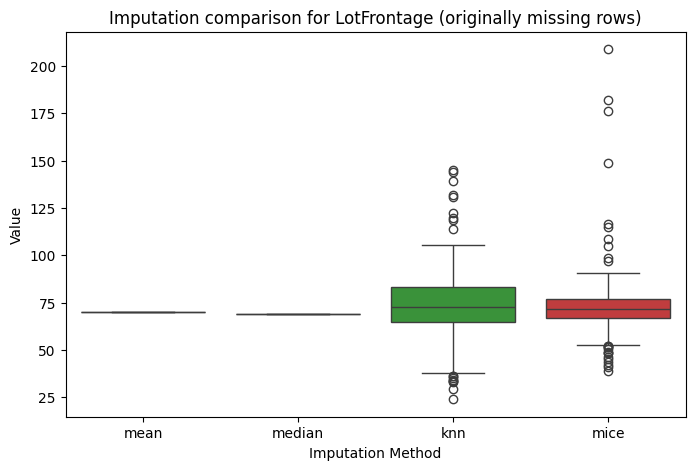

In [870]:
# Extract the imputed values for those rows
data_to_plot = df_all.loc[missing_rows, [col + s for s in suffixes]]

# Rename columns for plotting
data_to_plot.columns = ['mean', 'median', 'knn', 'mice']

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=data_to_plot)
plt.title(f'Imputation comparison for {col} (originally missing rows)')
plt.ylabel('Value')
plt.xlabel('Imputation Method')
plt.show()


In [871]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Categorical Data

In [872]:
# Categorical Data Examples for imputation: Alley, FireplaceQu, PoolQC
categorical_cols = df.select_dtypes(include='object')
categorical_cols.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [873]:
# Fill missing categorical values with mode.
df_mode_imputed = df.copy()
for col in categorical_cols:
    mode_val = df_mode_imputed[col].mode()[0]
    df_mode_imputed[col].fillna(mode_val, inplace=True)
df_mode_imputed

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [874]:
# Fill missing categorical values with constant value "Unknown".
df_constant_imputed = df.copy()
for col in categorical_cols:
    df_constant_imputed[col].fillna('Unknown', inplace=True)

df_constant_imputed

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,MnPrv,Unknown,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,4,2010,WD,Normal,142125


### Outlier detection

IQR Method

In [875]:
# Use IQR method to flag outliers in 'SalePrice'
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers_iqr = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
outliers_iqr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500


In [876]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['SalePrice']))
z_scores

outliers_z = df.loc[df['SalePrice'].index[(np.abs(z_scores) > 3)]]
outliers_z

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
349,350,60,RL,56.0,20431,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,New,Partial,437154
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
473,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,440000
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950


In [877]:
merged_outliers = pd.merge(outliers_iqr, outliers_z)
merged_outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
1,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
2,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
3,350,60,RL,56.0,20431,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,New,Partial,437154
4,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
5,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
6,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,440000
7,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
8,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
9,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950


In [878]:
# Use Isolation Forest to detect outliers in continuous data
isoforest = IsolationForest(contamination=0.01, random_state=0)
cont_data = df[continuous_cols].fillna(df[continuous_cols].median()) # Fil with median for now
iso_pred = isoforest.fit_predict(cont_data)
outliers_iso = df[iso_pred == -1]
outliers_iso

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
115,116,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,176000
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
755,756,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,172500


In [879]:
merged_outliers_final = pd.merge(merged_outliers, outliers_iso)
merged_outliers_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
2,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
3,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Outlier handling

In [880]:
# Cap 'LotFrontage' to upper and lower bounds calculated by IQR.
df_capped = df.copy()
df_capped['LotFrontage'] = np.where(df_capped['LotFrontage'] > upper_bound, upper_bound,
                                   np.where(df_capped['LotFrontage'] < lower_bound, lower_bound, df_capped['LotFrontage']))

In [881]:
# Impute outliers in 'LotFrontage' with median.
df_imputed_outliers = df.copy()
df_imputed_outliers.loc[df_imputed_outliers['LotFrontage'] > upper_bound, 'LotFrontage'] = df_imputed_outliers['LotFrontage'].median()
df_imputed_outliers.loc[df_imputed_outliers['LotFrontage'] < lower_bound, 'LotFrontage'] = df_imputed_outliers['LotFrontage'].median()

### Finalizing the data frame

In [882]:
# Replace the 'LotFrontage' column in df_selected with KNN-imputed values
df_selected.loc[:, 'LotFrontage'] = df_knn_imputed_knn['LotFrontage_knn']

In [892]:
# Replace the 'MasVnrArea' column in df_selected with KNN-imputed values
df_selected.loc[:, 'MasVnrArea'] = df_mean_imputed['MasVnrArea_mean']

In [895]:
# Not required since imputation was done in place

# for col in categorical_cols:
#     df_selected[col] = df_mode_imputed[col]

# df_selected

In [896]:

# for col in categorical_cols:
#     df_selected.loc[:, col] = df_mode_imputed[col+]

# df_selected

In [897]:
df_selected.isna().sum().sort_values(ascending=False)

MSSubClass       0
LotFrontage      0
LotArea          0
MasVnrArea       0
PoolArea         0
SalePrice        0
Alley            0
FireplaceQu      0
PoolQC           0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

### Exporting the data frame

In [898]:
df_selected

,MSSubClass,LotFrontage,LotArea,MasVnrArea,PoolArea,SalePrice,Alley,FireplaceQu,PoolQC,MSZoning,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,196.0,0,208500,Grvl,Gd,Gd,RL,...,Typ,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
1,20,80.0,9600,0.0,0,181500,Grvl,TA,Gd,RL,...,Typ,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
2,60,68.0,11250,162.0,0,223500,Grvl,TA,Gd,RL,...,Typ,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
3,70,60.0,9550,0.0,0,140000,Grvl,Gd,Gd,RL,...,Typ,Detchd,Unf,TA,TA,Y,MnPrv,Shed,WD,Abnorml
4,60,84.0,14260,350.0,0,250000,Grvl,TA,Gd,RL,...,Typ,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,0.0,0,175000,Grvl,TA,Gd,RL,...,Typ,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
1456,20,85.0,13175,119.0,0,210000,Grvl,TA,Gd,RL,...,Min1,Attchd,Unf,TA,TA,Y,MnPrv,Shed,WD,Normal
1457,70,66.0,9042,0.0,0,266500,Grvl,Gd,Gd,RL,...,Typ,Attchd,RFn,TA,TA,Y,GdPrv,Shed,WD,Normal
1458,20,68.0,9717,0.0,0,142125,Grvl,Gd,Gd,RL,...,Typ,Attchd,Unf,TA,TA,Y,MnPrv,Shed,WD,Normal


In [899]:
df_selected.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
MasVnrArea       0
PoolArea         0
SalePrice        0
Alley            0
FireplaceQu      0
PoolQC           0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [900]:
df_selected.to_csv("Cleaned_dataset.csv")